In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
r="winequality-red.csv"
datos=pd.read_csv(r,sep=";")
nombres= datos.columns

In [3]:
X=datos.drop(["quality"],axis=1).values
y=datos["quality"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=1234)

In [4]:
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

Entrenamiento del modelo

In [5]:
logreg=LogisticRegression()
logreg.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
logreg.coef_
coef=pd.DataFrame(logreg.coef_, columns=nombres[:-1],index=[3,4,5,6,7,8])
print("Coeficientes de regresión")
coef

Coeficientes de regresión


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3,0.267243,0.768151,0.225896,-0.090644,0.391828,0.328600,-0.653520,0.320498,0.331306,-0.352129,-0.290057
4,0.757034,0.528838,-0.031150,0.424698,-0.255252,-0.346795,-0.163783,-0.776771,0.665021,-0.440351,-0.696033
5,-0.467620,0.275033,0.087204,-0.165863,0.133918,-0.161202,0.527359,0.461032,-0.168587,-0.386842,-0.693670
6,-0.098953,-0.318438,-0.216928,-0.154447,-0.001268,0.220657,-0.332941,0.213010,0.006593,0.120127,0.331787
7,0.544402,-0.536065,-0.046053,0.344629,-0.420865,0.118304,-0.486179,-0.428498,0.047140,0.480401,0.686402
8,-0.478459,0.014924,0.509182,0.039656,-0.479061,0.179016,-0.694754,-0.092626,-0.638551,0.384492,0.679629


Prueba y evaluación de desempeño del modelo

In [7]:
predict=logreg.predict(X_test_scaled)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[  0   1   1   0   0   0]
 [  0   0   4   3   1   0]
 [  0   0 114  24   0   0]
 [  0   0  41  88   2   0]
 [  0   0   4  32   3   0]
 [  0   0   0   2   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00         8
          5       0.70      0.83      0.75       138
          6       0.59      0.67      0.63       131
          7       0.50      0.08      0.13        39
          8       0.00      0.00      0.00         2

avg / total       0.60      0.64      0.60       320



C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


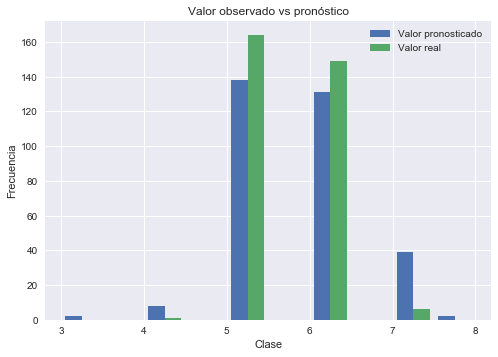

In [8]:
plt.hist([y_test,predict],label=["Valor pronosticado","Valor real"])
plt.title("Valor observado vs pronóstico")
plt.ylabel('Frecuencia')
plt.xlabel("Clase")
plt.legend(loc=0)
#plt.savefig("Error_logre")
plt.show()

Selección de características

In [9]:
rfe= RFE(logreg)
ref=rfe.fit(X_train_scaled,y_train)
car=pd.DataFrame(ref.ranking_,index=nombres[:-1],columns=["Importancia"])
print("Listado de las variables:")
print(car.sort_values(by="Importancia"))

Listado de las variables:
                      Importancia
volatile acidity                1
chlorides                       1
total sulfur dioxide            1
sulphates                       1
alcohol                         1
pH                              2
fixed acidity                   3
citric acid                     4
density                         5
residual sugar                  6
free sulfur dioxide             7


Incluyendo las variable identificadas como influyentes

In [10]:
Best=ref.ranking_==1
K=[]
for i in range(0,len(X)):
    K.append(X[i][Best])
X_new=np.asarray(K)

X_train2,X_test2=train_test_split(X_new,test_size=0.2,random_state=1234)
scaler2= preprocessing.StandardScaler().fit(X_train2)
X_train_scaled2=scaler2.transform(X_train2)
X_test_scaled2=scaler2.transform(X_test2)
X_test_scaled2

# Predicción con los mejores

logreg2=LogisticRegression()
logreg2.fit(X_train_scaled2,y_train)

predict2=logreg2.predict(X_test_scaled2)
print(confusion_matrix(y_test,predict2))
print(classification_report(y_test,predict2))

[[  0   0   2   0   0   0]
 [  0   0   4   4   0   0]
 [  0   0 116  22   0   0]
 [  0   0  46  84   1   0]
 [  0   0   4  31   4   0]
 [  0   0   0   1   1   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00         8
          5       0.67      0.84      0.75       138
          6       0.59      0.64      0.62       131
          7       0.67      0.10      0.18        39
          8       0.00      0.00      0.00         2

avg / total       0.61      0.64      0.60       320



C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


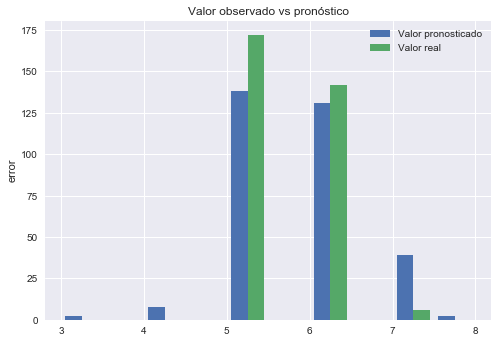

In [14]:
plt.hist([y_test,predict2],label=["Valor pronosticado","Valor real"])
plt.title("Valor observado vs pronóstico")
plt.ylabel('error')
plt.legend(loc=0)
plt.show()